In [346]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  matplotlib.colors import ListedColormap
from sklearn.preprocessing import OrdinalEncoder 
%matplotlib inline
df = pd.read_csv( "chip_dataset.csv" )
df = df.iloc [:, [0,2,5,6,7,8]]
df = df.dropna()
df = df.sample(150) #Берём выборку из общего датасета, чтобы уменьшить объём, иначе графики будут не очень наглядными))
df

,Unnamed: 0,Type,TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz)
3808,3808,GPU,15.0,87.0,1020.0,719.0
4223,4223,GPU,66.0,118.0,716.0,800.0
1897,1897,CPU,280.0,74.0,3800.0,4000.0
4526,4526,GPU,49.0,87.0,1020.0,1046.0
3151,3151,GPU,170.0,332.0,1950.0,823.0
...,...,...,...,...,...,...
4833,4833,GPU,375.0,352.0,4313.0,950.0
1441,1441,CPU,65.0,192.0,4800.0,3200.0
3203,3203,GPU,65.0,238.0,1170.0,810.0
1574,1574,CPU,89.0,144.0,69.0,2200.0


In [347]:
ordEnc = OrdinalEncoder()
df_copy = df.copy()
df_copy["Type"] = ordEnc.fit_transform(df[["Type"]]).astype(int)

# нормализация
vMin = df_copy.min( axis = 0 )
x = (df_copy - vMin) / (df_copy.max( axis = 0 ) - vMin)


Выполнить разбиение исходного набора на обучающую и тестовую выборки.

In [348]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(x, df_copy["Type"], test_size = 0.33, shuffle = True)

Применить алгоритм классификации для различного количества соседей (3)

In [349]:

Knn = KNeighborsClassifier(n_neighbors = 3)
Knn.fit(xTrain, yTrain)
yPred3 = Knn.predict(xTest)
yPred3


array([0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0])

Применить алгоритм классификации для различного количества соседей (5)

In [350]:
Knn = KNeighborsClassifier(n_neighbors = 5)
Knn.fit(xTrain, yTrain)
yPred5 = Knn.predict(xTest)
yPred5

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0])

Применить алгоритм классификации для различного количества соседей (7)

In [351]:
Knn = KNeighborsClassifier(n_neighbors = 7)
Knn.fit(xTrain, yTrain)
yPred7 = Knn.predict(xTest)
yPred7

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0])

In [352]:
yTest

904     0
4580    1
707     0
50      0
181     0
4113    1
1646    0
2629    1
3081    1
1897    0
3485    1
67      0
3662    1
3203    1
2516    1
3571    1
2912    1
2858    1
3142    1
90      0
2905    1
2730    1
3336    1
2188    0
2160    0
1240    0
2370    1
3695    1
3841    1
890     0
1033    0
2259    1
1911    0
2608    1
1142    0
3677    1
3949    1
2541    1
1880    0
3063    1
3000    1
684     0
956     0
1441    0
2368    1
1675    0
2888    1
1798    0
3941    1
774     0
Name: Type, dtype: int64

Сравнить предсказание с метками тестовой выборки

In [353]:
yTest==yPred3, yTest==yPred5, yTest==yPred7

(904     True
 4580    True
 707     True
 50      True
 181     True
 4113    True
 1646    True
 2629    True
 3081    True
 1897    True
 3485    True
 67      True
 3662    True
 3203    True
 2516    True
 3571    True
 2912    True
 2858    True
 3142    True
 90      True
 2905    True
 2730    True
 3336    True
 2188    True
 2160    True
 1240    True
 2370    True
 3695    True
 3841    True
 890     True
 1033    True
 2259    True
 1911    True
 2608    True
 1142    True
 3677    True
 3949    True
 2541    True
 1880    True
 3063    True
 3000    True
 684     True
 956     True
 1441    True
 2368    True
 1675    True
 2888    True
 1798    True
 3941    True
 774     True
 Name: Type, dtype: bool,
 904     True
 4580    True
 707     True
 50      True
 181     True
 4113    True
 1646    True
 2629    True
 3081    True
 1897    True
 3485    True
 67      True
 3662    True
 3203    True
 2516    True
 3571    True
 2912    True
 2858    True
 3142    True
 90     

Объяснить, какой из какой из параметров метода дает лучший результат

In [354]:
unique, testCounts = np.unique(yTest, return_counts=True)
unique, predCounts = np.unique(yPred3, return_counts=True)
print(f"Кол-во меток классов в тестовой: {testCounts},\nКол-во меток классов в предсказании: {predCounts} 3 соседа")

Кол-во меток классов в тестовой: [22 28],
Кол-во меток классов в предсказании: [22 28] 3 соседа


In [355]:
unique, testCounts = np.unique(yTest, return_counts=True)
unique, predCounts = np.unique(yPred5, return_counts=True)
print(f"Кол-во меток классов в тестовой: {testCounts},\nКол-во меток классов в предсказании: {predCounts} 5 соседей")

Кол-во меток классов в тестовой: [22 28],
Кол-во меток классов в предсказании: [22 28] 5 соседей


In [356]:
unique, testCounts = np.unique(yTest, return_counts=True)
unique, predCounts = np.unique(yPred7, return_counts=True)
print(f"Кол-во меток классов в тестовой: {testCounts},\nКол-во меток классов в предсказании: {predCounts} 7 соседей")

Кол-во меток классов в тестовой: [22 28],
Кол-во меток классов в предсказании: [22 28] 7 соседей


Сопоставление результатов показало, что все наборы соседей показали близкие к тестовой выборке значения.

Построить Confusion Matrix, дать пояснения

In [357]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

conMat3 = confusion_matrix(yTest, yPred3)
conMat5 = confusion_matrix(yTest, yPred5)
conMat7 = confusion_matrix(yTest, yPred7)
print("3 соседа\n", conMat3, "\n5 соседей\n",conMat5, "\n7 соседей\n", conMat7)

3 соседа
 [[22  0]
 [ 0 28]] 
5 соседей
 [[22  0]
 [ 0 28]] 
7 соседей
 [[22  0]
 [ 0 28]]


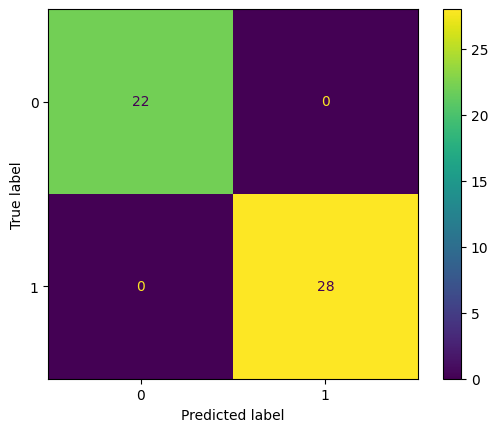

In [358]:
cmDisp = ConfusionMatrixDisplay(confusion_matrix = conMat3)
cmDisp.plot()
plt.show()



TP(1 ячейка) - True Positive (истинно положительный результат) - верно отнесли объект к классу (главная диагональ)

FN(2 ячейка) - False Negative (ложно-отрицательный результат) - ложно исключили объект из класса

FP(3 ячейка) - False Positive (ложно-положительный результат) - ложно подтвердили принадлежность объекта к классу

TN(4 ячейка) - True Negative (истинно отрицательный результат) - характерен для бинарной классификации, а не классовой: верно исключили принадлежность к классу (обратное к TP)


In [359]:
print("3 соседа")
print(classification_report(yTest, yPred3))
print("5 соседей")
print(classification_report(yTest, yPred5))
print("7 соседей")
print(classification_report(yTest, yPred7))
 

3 соседа
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        28

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

5 соседей
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        28

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

7 соседей
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        28

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00  

Методы регрессии

1. Выбрать в качестве X и Y числовые переменные (если требуется, нормировать данные)

2. Разбить выборку на обучающую и тестовую

In [360]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

scaler = StandardScaler()
x = scaler.fit_transform(df_copy)
y = df.iloc [:, [5]]
XTrain, XTest, YTrain, YTest = train_test_split(x, y, test_size = 0.5)

KNN

In [361]:
Regr = KNeighborsRegressor(n_neighbors=5)
Regr.fit(XTrain, YTrain)
YPred = Regr.predict(XTest)

In [362]:
np.c_[YPred, YTest]

array([[ 478.8,  625. ],
       [ 620.4,  902. ],
       [2620. , 2527. ],
       [ 701. ,  823. ],
       [1037.4,  993. ],
       [ 904.8, 1076. ],
       [ 755.8,  926. ],
       [1107. ,  836. ],
       [ 572.8,  670. ],
       [2566.6, 2394. ],
       [ 344.6,  166. ],
       [3073.2, 3200. ],
       [3392. , 4000. ],
       [ 479.6,  600. ],
       [1191.8,  900. ],
       [ 899. , 1006. ],
       [2980. , 3100. ],
       [ 605. ,  601. ],
       [1304.6,  920. ],
       [3019.8, 2800. ],
       [2800. , 2100. ],
       [ 511.4,  550. ],
       [ 975. , 1223. ],
       [3079.8, 3500. ],
       [2700. , 2833. ],
       [3140. , 3400. ],
       [1886.8, 1700. ],
       [ 688.8,  810. ],
       [2340. , 2500. ],
       [ 817.2,  950. ],
       [ 418.8,  575. ],
       [1076.2,  400. ],
       [ 960. , 1090. ],
       [1986.8, 2000. ],
       [2620. , 2800. ],
       [ 656.8,  745. ],
       [1766.8, 1200. ],
       [2952. , 2800. ],
       [3178.6, 3600. ],
       [2980. , 3100. ],


In [363]:
#коэффициент детерминации R^2(насколько хорошо полученная модель соответствует реальным данным):
rsq = Regr.score(XTest, YTest)

In [364]:
mse = ((YPred - YTest)**2).mean()
mae = np.abs(YPred - YTest).mean()
print(f"MSE: {mse}, MAE: {mae}, R2: {rsq}")

MSE: Freq (MHz)    62557.952
dtype: float64, MAE: Freq (MHz)    195.125333
dtype: float64, R2: 0.9458095559830357


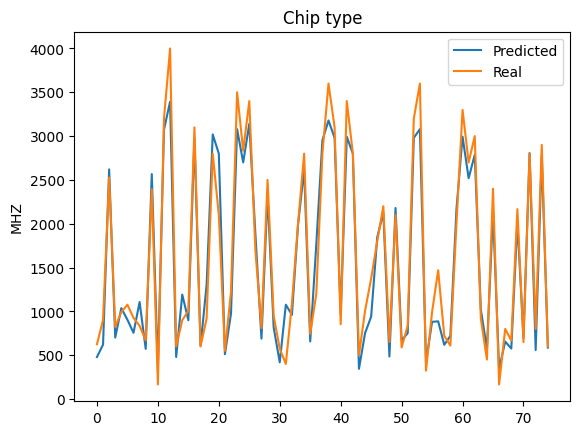

In [365]:
YTest = YTest.to_numpy().astype(float)
plt.plot(YPred)
plt.plot(YTest)
plt.legend(["Predicted", "Real"])
plt.ylabel("MHZ")
plt.title("Chip type")
plt.show()

Линейная регрессия

In [366]:
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
types = df_copy[df_copy["Type"] == 0][["TDP (W)","Freq (MHz)"]].to_numpy()
norm = MinMaxScaler()
types = norm.fit_transform(iris)
weight = iris[:,1]
height = iris[:,0].reshape(-1,1)

#обучение модели
linReg = linear_model.LinearRegression()
linReg.fit(height, weight)

#построение предсказания
weightPred = linReg.predict(height)

print(f"Параметры прямой: b0 = {linReg.intercept_}, наклон: {linReg.coef_[0]}")
print(f"y = {linReg.intercept_} + {linReg.coef_[0]} x")
print(f"Коэффициент детерминации R2: {linReg.score(height, weight)}")

Параметры прямой: b0 = 0.3436378420106471, наклон: 0.44142565522637
y = 0.3436378420106471 + 0.44142565522637 x
Коэффициент детерминации R2: 0.1530884950327267


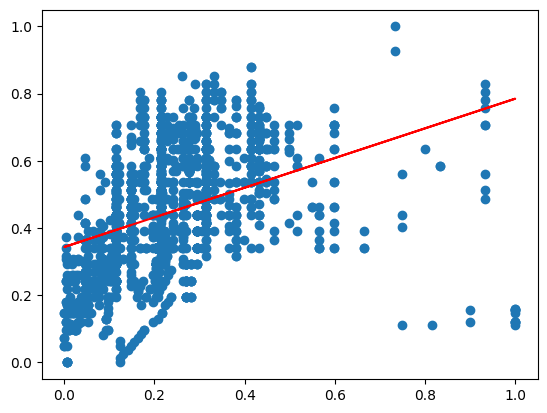

In [367]:
plt.scatter(height, weight)
plt.plot(height,weightPred, color="red")

plt.show()

Гребневая регрессия

In [368]:
rig = linear_model.Ridge(alpha=.5)
rig.fit(height, weight)

#построение предсказания
wRigPred = rig.predict(height)

print(f"Параметры прямой: b0 = {rig.intercept_}, наклон: {rig.coef_[0]}")
print(f"y = {rig.intercept_} + {rig.coef_[0]} x")
print(f"Коэффициент детерминации R2: {rig.score(height, weight)}")


Параметры прямой: b0 = 0.34498647108397273, наклон: 0.43585867185591476
y = 0.34498647108397273 + 0.43585867185591476 x
Коэффициент детерминации R2: 0.15306414681027158


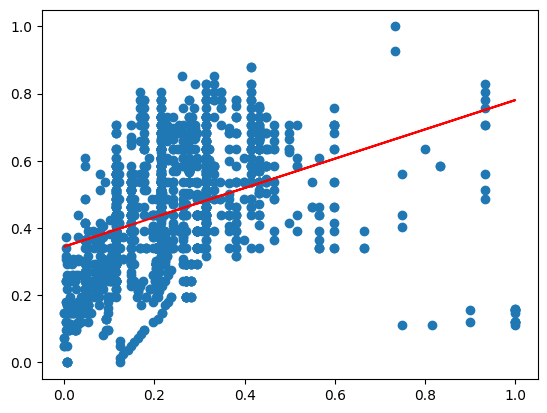

In [369]:
plt.scatter(height, weight)
plt.plot(height,wRigPred, color="red")

plt.show()

Лассо

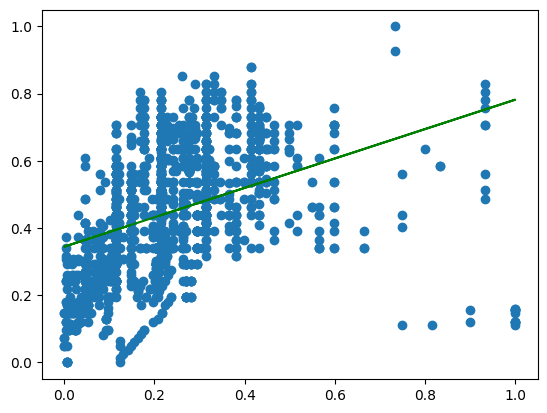

MSE: 0.027349332054436976, MAE: 0.1317013610175103, R2: 0.1530762891913372


In [370]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

lasso = Lasso()

#поиск параметра "альфа" на логарифмической сетке GridSearchCV от 10^-15 до 10^15
parameters = {"alpha" : np.logspace(-15,15,31)}
lassoCV = GridSearchCV(lasso, parameters, scoring = "neg_mean_squared_error", cv = 5)

lassoCV.fit(height, weight)
lassoPred = lassoCV.predict(height)

plt.scatter(height, weight)
plt.plot(height,lassoPred, color="green")
plt.show()

lassoMSE = ((lassoPred - weight)**2).mean()
lassoMAE = np.abs(lassoPred - weight).mean()
lassoR2 = r2_score(weight, lassoPred)
print(f"MSE: {lassoMSE}, MAE: {lassoMAE}, R2: {lassoR2}")

Логистическая

,Unnamed: 0,Type,TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz)
3808,3808,1,15.0,87.0,1020.0,719.0
4223,4223,1,66.0,118.0,716.0,800.0
1897,1897,0,280.0,74.0,3800.0,4000.0
4526,4526,1,49.0,87.0,1020.0,1046.0
3151,3151,1,170.0,332.0,1950.0,823.0
...,...,...,...,...,...,...
4833,4833,1,375.0,352.0,4313.0,950.0
1441,1441,0,65.0,192.0,4800.0,3200.0
3203,3203,1,65.0,238.0,1170.0,810.0
1574,1574,0,89.0,144.0,69.0,2200.0


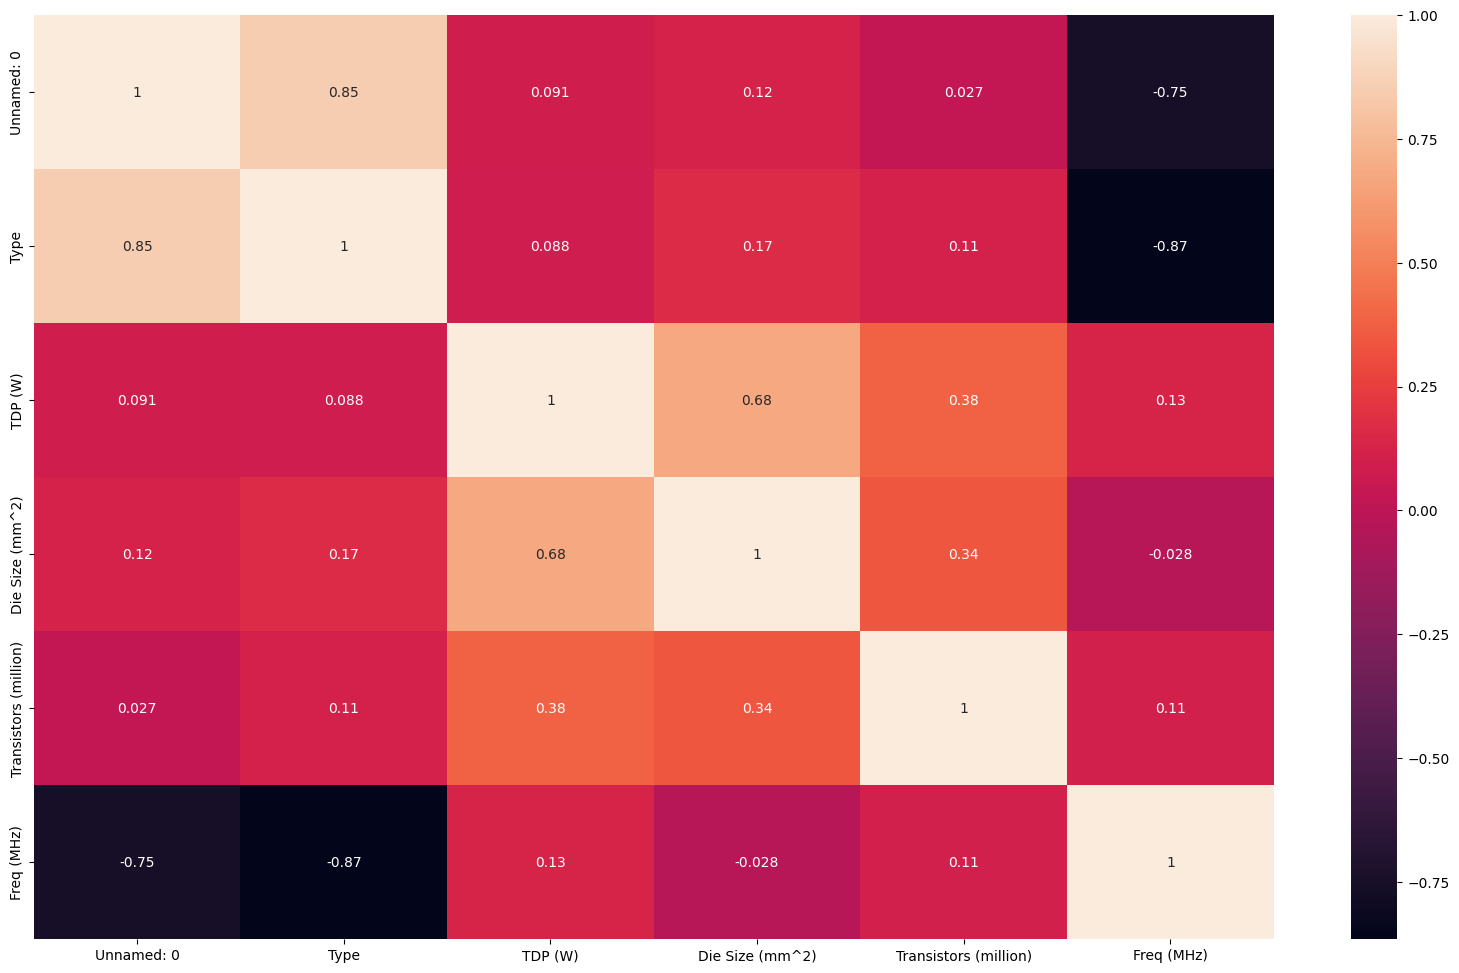

In [371]:

%matplotlib inline

import seaborn as sns
plt.figure(figsize=(20,12))
sns.heatmap(df_copy.corr(), annot = True)
df_copy

In [372]:
X = df_copy.drop("Type", axis = 1).copy()
Y = df_copy.iloc[:,-5]
X.head()

,Unnamed: 0,TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz)
3808,3808,15.0,87.0,1020.0,719.0
4223,4223,66.0,118.0,716.0,800.0
1897,1897,280.0,74.0,3800.0,4000.0
4526,4526,49.0,87.0,1020.0,1046.0
3151,3151,170.0,332.0,1950.0,823.0


In [373]:
Y.value_counts()

1    84
0    66
Name: Type, dtype: int64

In [374]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.2, random_state = 0, shuffle = True)

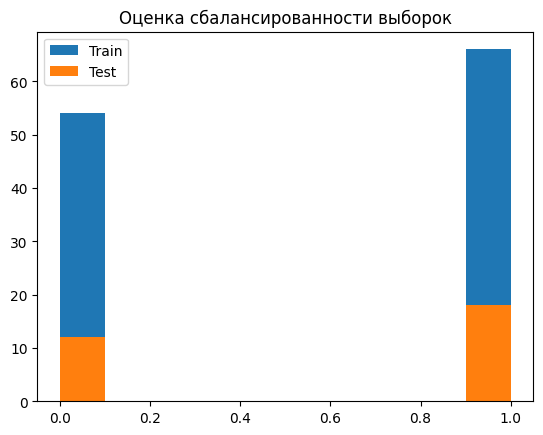

In [375]:
plt.hist(Ytrain, label = "Train")
plt.hist(Ytest, label = "Test")
plt.legend()
plt.title("Оценка сбалансированности выборок")
plt.show()

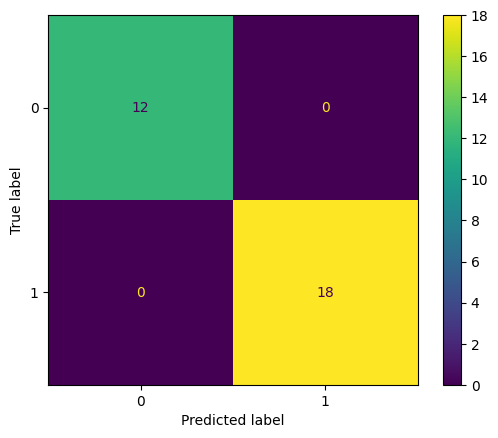

In [376]:


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

logRes = LogisticRegression(random_state = 0, max_iter = 1000)
lrModel = logRes.fit(Xtrain, Ytrain)
Ypred = lrModel.predict(Xtest)
Yprob = lrModel.predict_proba(Xtest)[:,1] #для ROC-кривой

confMatr = confusion_matrix(Ytest, Ypred)
cmPlt = ConfusionMatrixDisplay(confusion_matrix = confMatr)
cmPlt.plot()
plt.show()



[1.00000000e+00 1.00000000e+00 1.01811295e-25 2.35293248e-13
 9.99999999e-01 9.52712712e-15 1.00000000e+00 1.00000000e+00
 3.86352847e-10 9.11779503e-16 8.40907620e-14 2.09674274e-29
 1.00000000e+00 1.00000000e+00 8.07124128e-25 1.00000000e+00
 6.71742998e-13 1.51940591e-22 2.42569527e-03 1.00000000e+00
 1.00000000e+00 5.80794817e-01 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 2.07139426e-08 1.00000000e+00
 1.00000000e+00 1.00000000e+00]


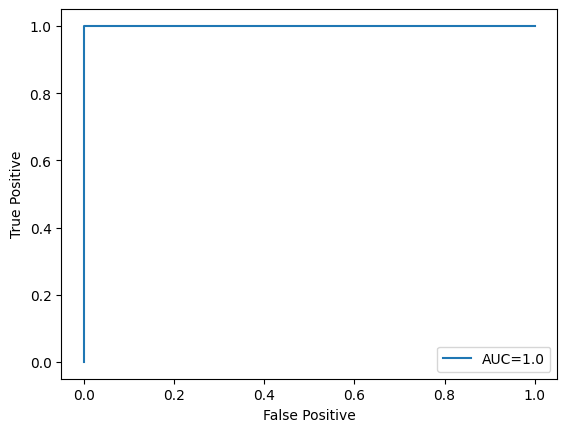

In [377]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
print(Yprob)
auc = roc_auc_score(Ytest, Yprob)
fpr, tpr, thresholds = roc_curve(Ytest, Yprob)
plt.plot(fpr, tpr, label = "AUC="+str(auc))
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.legend()